In [15]:
%matplotlib widget
import pandas as pd
import numpy as np
import csv  
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
import matplotlib
import math
import correlation_inspector


# load data from csv

In [2]:
def load():
    filename="collected_results.csv"
    fields=pd.read_csv(filename, index_col=0, nrows=0).columns.tolist()
    data=np.genfromtxt(filename,skip_header=1,delimiter=",")
    return fields,data.transpose()

fields,data=load()

# plot correlation_matrix

In [ ]:
correl_inspect=correlation_inspector(data,fields

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
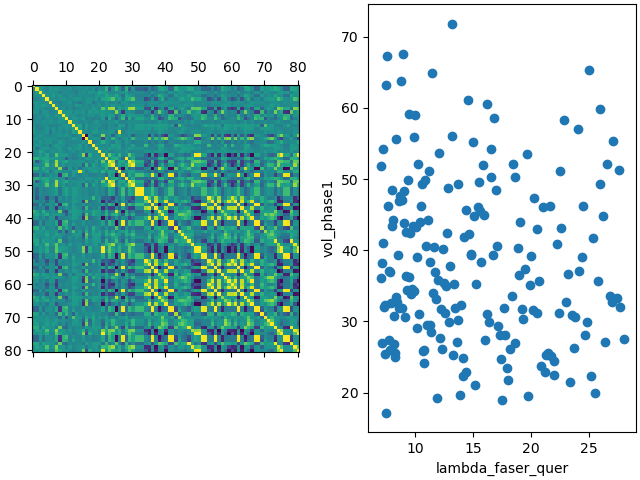

In [23]:
if "fig" in globals():
    plt.close(fig)
key_to_inspect="control"
key_pressed=False
def plot_scatter(fig,xdat,ydat):
    ax=fig.axes[-1]
    tex_ax=fig.axes[-2]
    if with_box:
        pass
    else:
        ax.clear()
        name_x=fields[xdat]
        name_y=fields[ydat]
        ax.scatter(data[xdat,:],data[ydat,:])
        ax.set_xlabel(name_x)
        ax.set_ylabel(name_y)
    
def on_key_press(event):
    global key_pressed
    if event.key==key_to_inspect:
        key_pressed=True
    
def on_key_release(event):
    if event.key==key_to_inspect:
        key_pressed=False
    
def onclick(event):
    global key_pressed
    if event.dblclick:
        text=str((event.xdata, event.ydata))
    else:
        text="single_click"
    if with_box:
         text_box.set_val(text)
    if True:
        xdat=math.floor(event.xdata)
        ydat=math.floor(event.ydata)
        plot_scatter(fig,xdat,ydat)

def calc_correl(data):
    return np.corrcoef(data)
with_box=False
def plot_correl(correlation):
    #create figure
    fig=plt.figure(constrained_layout=True)
    heights = [1,7] #height ratio of both axes
    
    if with_box:
        spec = fig.add_gridspec(ncols=2, nrows=2,height_ratios=heights)
    else:
        spec = fig.add_gridspec(ncols=2, nrows=1)
        
    #create axes 0 for plotting correlation-plot
    ax0=fig.add_subplot(spec[:,0])
    ax0.matshow(correlation)
    #create axes 1 for output of click
    if with_box:
        ax1=fig.add_subplot(spec[0,1])
        text="dummy"#str((event.xdata, event.ydata))
        text_box = TextBox(ax1, "Selected label",initial=text)
        text_box.set_val(text)
    else:
        text_box=None
    
    ax0=fig.add_subplot(spec[-1,1])
    fig.canvas.mpl_connect('button_press_event', onclick)
    fig.canvas.mpl_connect('key_press_event', on_key_press)
    fig.canvas.mpl_connect('key_release_event', on_key_release)
    return fig,text_box,spec

correlation=calc_correl(data)
fig,text_box,spec=plot_correl(correlation)
plot_scatter(fig,10,30)
